# Sign Language Identification

Problem Statement: Develop a deep learning model to accurately classify sign language alphabet images into their respective classes.

Objective: The objective of this project is to train a deep learning model that can accurately classify sign language alphabet images into their respective classes. The model should be able to generalize well on unseen data and achieve a high accuracy on the test set.

The American Sign Language (ASL) is used by the deaf and hard-of-hearing community to communicate using visual gestures instead of sound. The ability to recognize and interpret sign language is crucial for effective communication with this community  However, sign language communication can be challenging for those who do not understand sign language. Therefore, the development of a deep learning model that can accurately recognize and classify sign language alphabets can have a significant impact on improving communication with the deaf and hard-of-hearing community.

**Data Collection & Description**

The dataset used here is the 'Sign Language MNIST' dataset was collected and made publicly available by researchers at the National Institute of Standards and Technology (NIST) and Gallaudet University.

The dataset is available on Kaggle. 

Tecperson. (2017, October 20). Sign language mnist. Kaggle. Retrieved March 27, 2023,

from https://www.kaggle.com/datasets/datamunge/sign-language-mnist 

The dataset consists of 27,455 grayscale images of sign language alphabets, each of size 28 x 28 pixels.

 - There are total 24 lables (in american sign language) A-I,K-Y (A-Z except J and Z)

 - First column in each row represnts label with the image

 - From 2nd columns onwards each column represents the pixel values associated , representing a 28x28 grayscale image


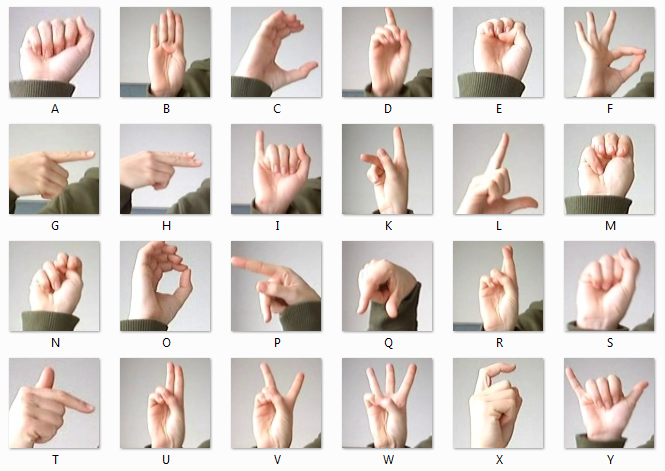

In [1]:
#importing liraries
import keras
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("sign_mnist_train.csv")
print(df.shape)
df.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
#Define a dictionary to map labels to corresponding ASL alphabets
asl_alphabets = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
    5: 'F', 6: 'G', 7: 'H', 8: 'I',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
    15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'
}

# Create a new column with the corresponding ASL alphabet for each label
df['label'] = df['label'].map(asl_alphabets)

In [4]:
# put labels into y variable
y = df["label"]
# Drop 'label' column to get X
X = df.drop(labels = ["label"],axis = 1) 

**Exploratory Data Analysis**

C:\Users\mikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of sign classes')

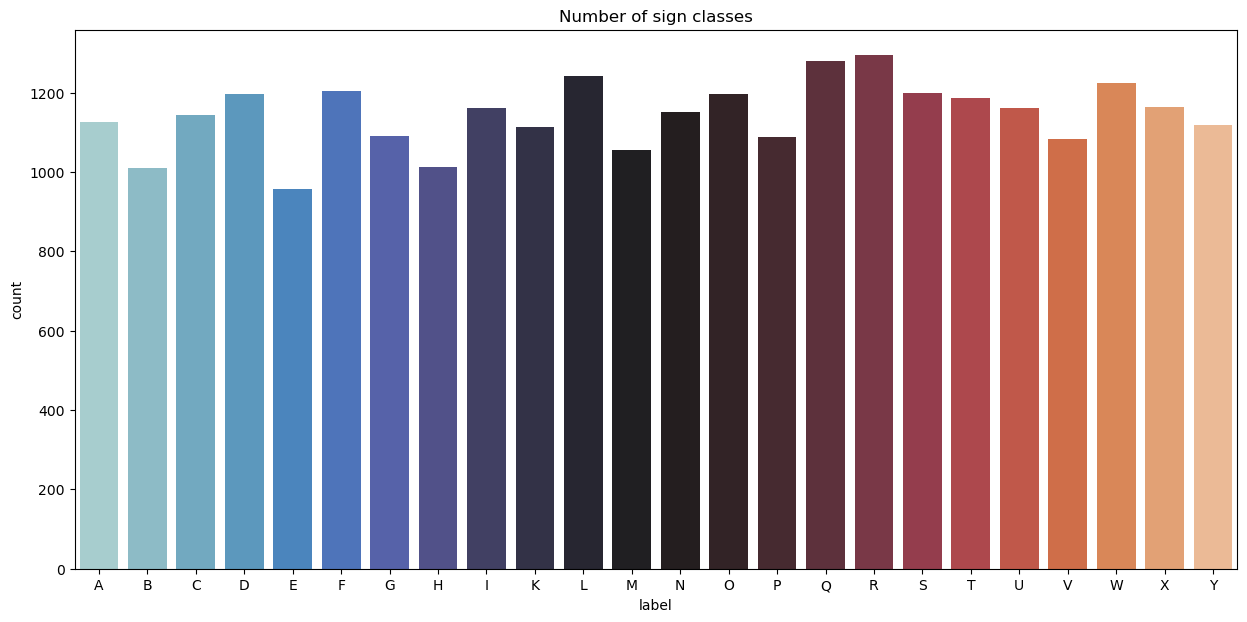

In [5]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(df['label'], palette="icefire", order=sorted(df['label'].unique()))
plt.title("Number of sign classes")

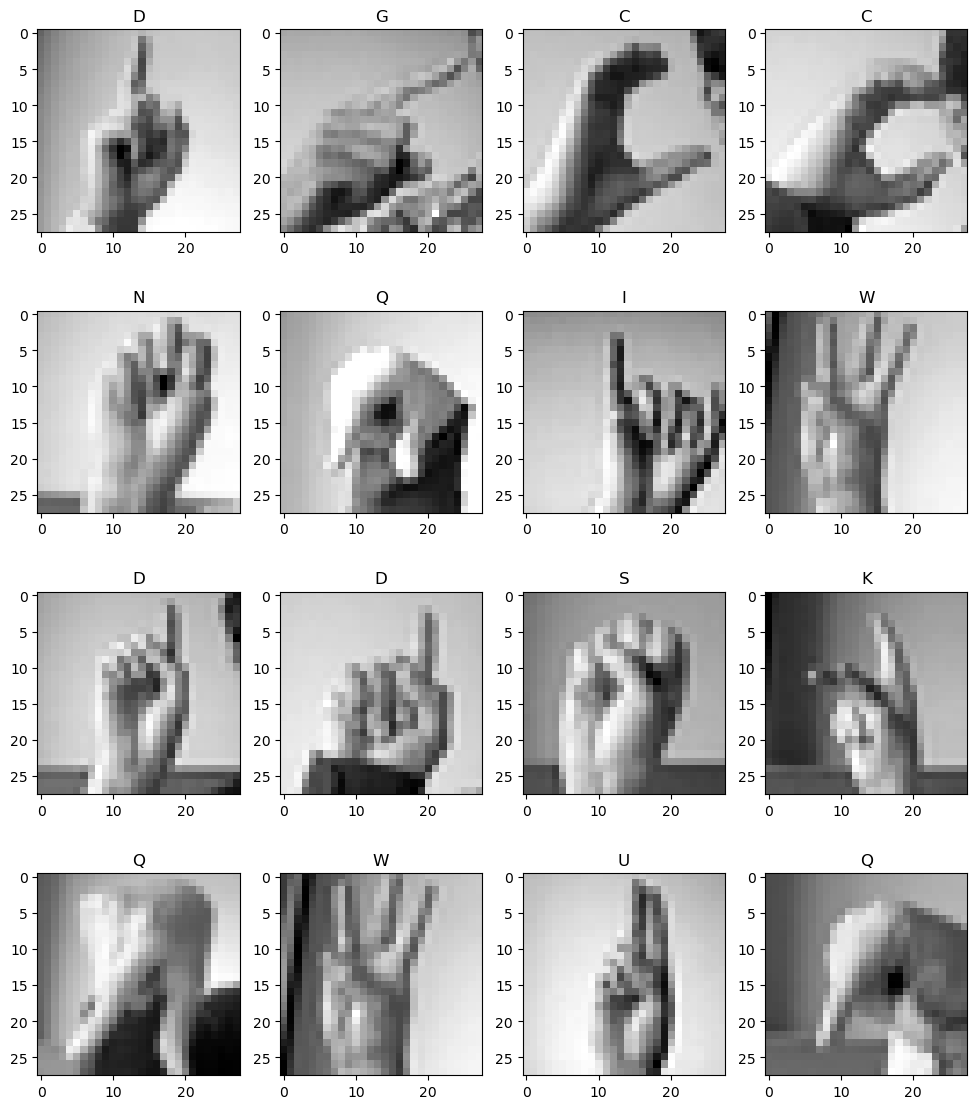

In [6]:
#Plotting some samples
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X.iloc[i].to_numpy().reshape(28,28), cmap='gray')
    ax.set(title = df.iloc[i,0])

**Data Preprocessing**

Label binarization is a necessary step in the machine learning pipeline because most machine learning algorithms are designed to work with numerical data, not categorical data. In the case of the Sign Language MNIST dataset, the labels represent the ASL gestures, which are categorical in nature.

In [7]:
#Label Encoding 
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In the dataset, each image is represented as a 28x28 grayscale image, with pixel values ranging from 0 to 255. Scaling the pixel values to a range of 0 to 1. Normalization can help improve the performance and convergence of the CNN model during training by ensuring that the input values are within a similar range.

In [8]:
# Normalize the data
X = X / 255.0
print("X shape: ",X.shape)

X shape:  (27455, 784)


In the dataset, each image is represented as a flattened array of length 784 (28x28). However, in order to use the data as input for a Convolutional Neural Network (CNN), the input data needs to be reshaped into a 4D tensor with dimensions (batch_size, height, width, channels).

In [9]:
# Reshape
X = X.values.reshape(-1,28,28,1)
print("X shape: ",X.shape)

X shape:  (27455, 28, 28, 1)


In [10]:
# Splitting the train and the test set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (24709, 28, 28, 1)
x_test shape (2746, 28, 28, 1)
y_train shape (24709, 24)
y_test shape (2746, 24)


**Model Building**

The CNN (Convolutional Neural Network) architecture is often used for image classification tasks, due to its ability to automatically extract features from the images.

The CNN architecture is chosen for this problem because it is able to learn spatial hierarchies of features from the input images by using convolutional layers. The convolutional layers apply filters to the input image, which helps to extract useful features such as edges and shapes, from the images. The pooling layers help to reduce the spatial dimensions of the feature maps and control overfitting.

In [11]:
#Defining the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

model = Sequential()

#Feature Extraction Layer #1
model.add(Conv2D(12 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

#Feature Extraction Layer #2
model.add(Conv2D(24 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

The first feature extraction layer extracts 24 different features from the input image using a 3x3 kernel size and a rectified linear unit (ReLU) activation function.

The max pooling layer reduces the spatial dimensions of the output feature maps by a factor of 2 while preserving the most important information. 

The dropout layer is added to regularize the model and prevent overfitting.

The second feature extraction layer extracts 12 different features from the output of the first layer using the same configuration of convolutional and max pooling layers. Again, a dropout layer is added for regularization.

The fully connected layer consist of a dense layer with 512 units and a ReLU activation function. This layer is responsible for taking the output of the second feature extraction layer and mapping it to a feature vector that can be used for classification. The feature vector consists of 512 values, each representing a different combination of the extracted features.

Finally, the dense output layer with 24 units and a softmax activation function, which is responsible for predicting the class probabilities for each input image. The softmax activation function ensures that the predicted probabilities sum up to one, making it suitable for multi-class classification problems.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 12)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 24)        2616      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 24)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 24)          0

**Data augmentation** is done to increase the amount of data available for training the model, which can improve the generalization performance of the model.

ImageDataGenerator class from Keras applies a set of random transformations to the images in real-time during training, thus creating new variations of the images on-the-fly. This can help prevent overfitting and improve the accuracy of the model on new, unseen images.

In [13]:
#Data augmentations
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        )
datagen.fit(X_train)

For the data augmentation

Randomly rotated some training images by 10 degrees Randomly Zoomed by 10% some training images Randomly shifted images horizontally by 10% of the width Randomly shifted images vertically by 10% of the height

vertical_flip and horizontal_flip is not applied since it could have lead to misclassification.

**Fitting the model** with epochs = 10 and batch size = 64

In [14]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 64) ,epochs = 10 , validation_data = (X_test, y_test))

Epoch 1/10
387/387 [==============================] - 21s 53ms/step - loss: 2.3998 - accuracy: 0.2750 - val_loss: 1.0459 - val_accuracy: 0.7265
Epoch 2/10
387/387 [==============================] - 21s 54ms/step - loss: 1.1904 - accuracy: 0.6188 - val_loss: 0.3811 - val_accuracy: 0.9064
Epoch 3/10
387/387 [==============================] - 21s 55ms/step - loss: 0.7409 - accuracy: 0.7539 - val_loss: 0.1931 - val_accuracy: 0.9574
Epoch 4/10
387/387 [==============================] - 21s 53ms/step - loss: 0.5361 - accuracy: 0.8199 - val_loss: 0.1190 - val_accuracy: 0.9789
Epoch 5/10
387/387 [==============================] - 20s 52ms/step - loss: 0.4209 - accuracy: 0.8579 - val_loss: 0.0751 - val_accuracy: 0.9942
Epoch 6/10
387/387 [==============================] - 20s 53ms/step - loss: 0.3438 - accuracy: 0.8836 - val_loss: 0.0652 - val_accuracy: 0.9858
Epoch 7/10
387/387 [==============================] - 20s 50ms/step - loss: 0.2863 - accuracy: 0.9029 - val_loss: 0.0383 - val_accuracy:

**Model Evaluation**

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# predict for test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

86/86 [==============================] - 1s 9ms/step
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


From the evaluation metrics we can see that the model is performing well on the test dataset. 

Text(0, 0.5, 'Accuracy')

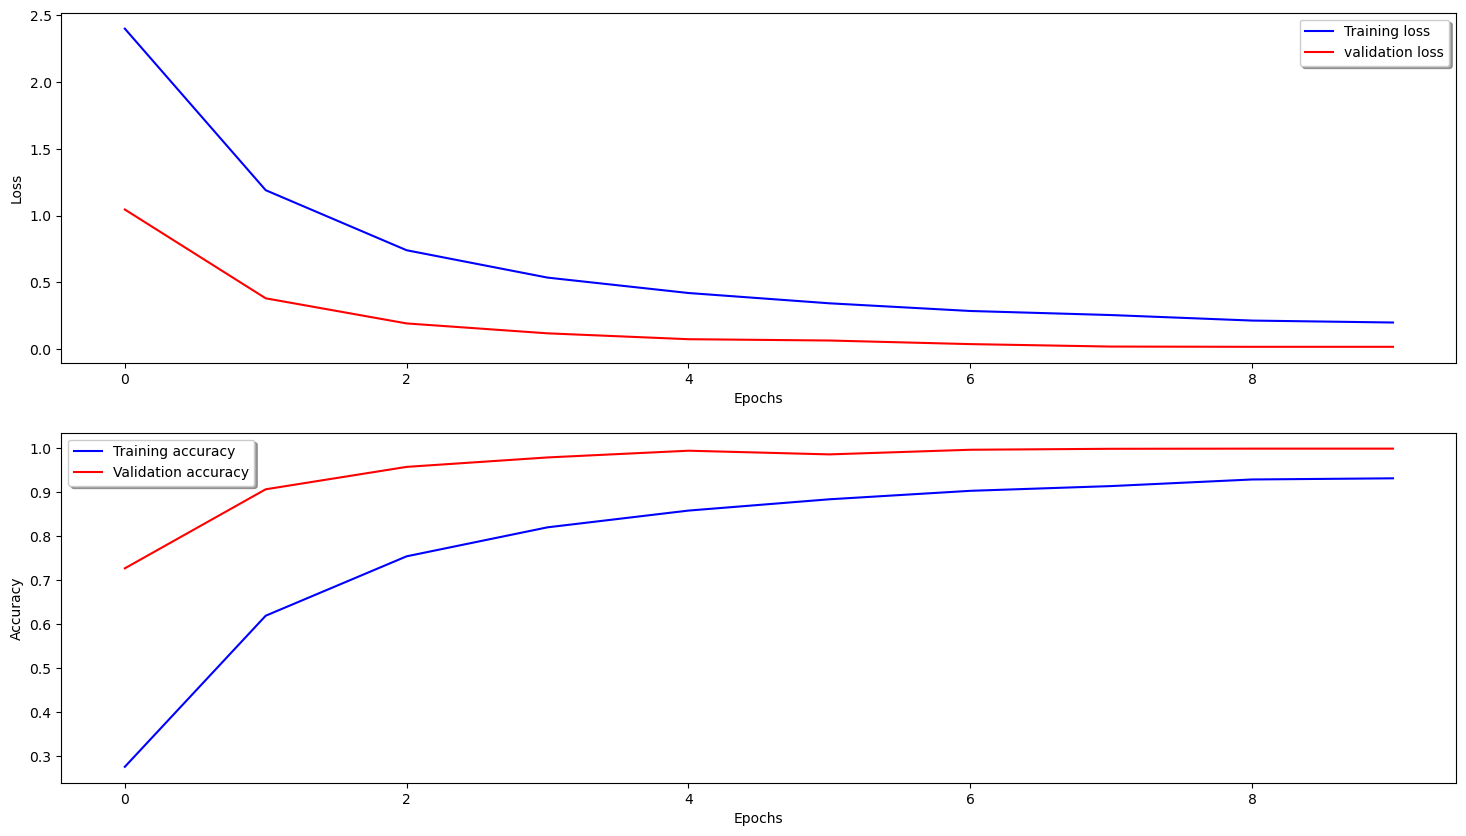

In [16]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

 - The training and validation loss decreases steadily over time, with no increase or fluctuations.
 - The training and validation accuracy increases steadily over time, with no decrease or fluctuations.
 - The training and validation curves are coming close to each other, indicating that the model is not overfitting or underfitting.
 - The overall trend of both the loss and accuracy curves are moving towards a plateau, indicating that the model is learning and improving with each epoch.

**Prediction using trained model**

In [17]:
#loading dataset for testing
test_df = pd.read_csv("sign_mnist_test.csv")

In [18]:
#Creating a new column with the corresponding ASL alphabet for each label
test_df['label'] = test_df['label'].map(asl_alphabets)

In [19]:
#Defining label and input for the test data.
test_X = test_df.drop(labels = ["label"],axis = 1) 
test_y = test_df["label"]

# Normalize the data
test_X = test_X / 255.0

# Reshape
test_X = test_X.values.reshape(-1,28,28,1)

In [20]:
y_pred = model.predict(test_X)
test_X__ = test_X.reshape(test_X.shape[0], 28, 28)

#Decoding the binary labels back into alphabets
y_pred = label_binarizer.inverse_transform(y_pred)

225/225 [==============================] - 2s 8ms/step


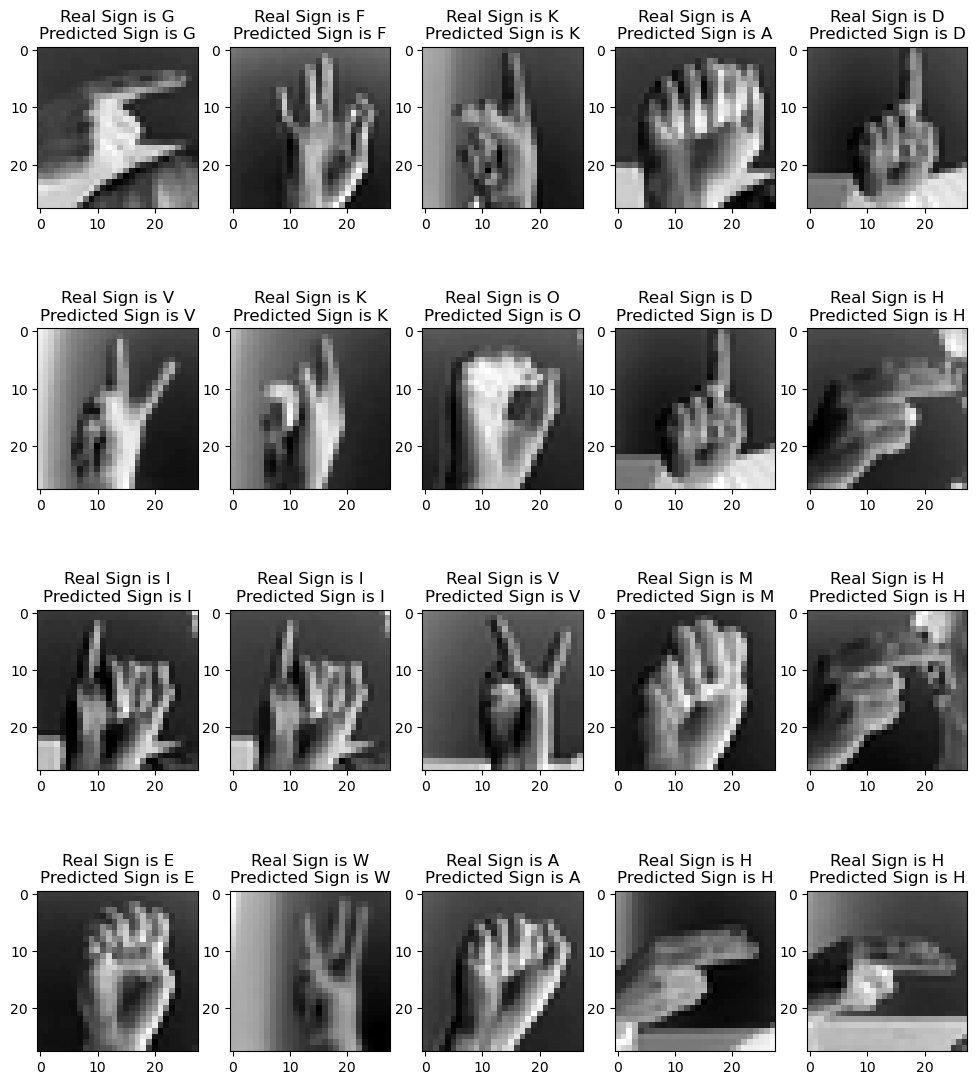

In [21]:
#Plotting some Real sign vs Predicited signs
fig, axis = plt.subplots(4, 5, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_X__[i], cmap='binary')
    ax.set(title = f"Real Sign is {test_y[i]}\nPredicted Sign is {y_pred[i]}");